## ROI for Dr. Ding
* Region related['MM','AV','ENTm','RE','AM','ENTl','PL','BLA','ILA','COAp','COAa','TR','RSPv','OT','LSc','LSv','LSr','BST']
* selected Regions: ['CA1','SUB','ProS']

In [1]:
import numpy as np
import pandas as pd
import re
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import neuro_morpho_toolbox as nmt

import pickle
%matplotlib inline

F:\Users\zzjun\Anaconda3\lib\site-packages\neuro_morpho_toolbox-0.1-py3.7.egg\neuro_morpho_toolbox\
Loading CCF Atlas data...
Loading time: 0.67
Loading CCF brain structure data...
Loading time: 0.00
Loading selected CCF Atlas and Contour data...
Loading time: 1.72


### Code to store swc as flipped one
```Python
import os
swc_path_old = 'D:/Handover_Zijun/Janelia_1000_rm'
folder = os.path.exists('D:/Handover_Zijun/Janelia_1000_flip')
if not folder:         
    os.makedirs('D:/Handover_Zijun/Janelia_1000_flip')  
from neuro_morpho_toolbox.neuron_set import load_swc_list
#Read the swc inside this path to adictionary
dicAll = load_swc_list(swc_path_old)
for i in dicAll.keys():
    if len(dicAll[i].swc[dicAll[i].swc.z>midline].index.tolist())>0:
        dicAll[i].swc.loc[dicAll[i].swc[dicAll[i].swc.z>midline].index.tolist(),'z'] = nmt.annotation.micron_size['z'] - dicAll[i].swc.loc[dicAll[i].swc[dicAll[i].swc.z>midline].index.tolist(),'z']
    pathdes = 'D:/Handover_Zijun/Janelia_1000_flip'
    dicAll[i].swc.to_csv(os.path.join(pathdes,str(i.split("\\")[1])+'.swc'), sep=" ")
    print(i)
```

In [2]:
swc_path = 'D:/Handover_Zijun/Janelia_1000_flip'

related_region_name =['CA1','SUB','ProS','MM','AV','ENTm','RE','AM','ENTl','PL','BLA','ILA','COAp','COAa','TR','RSPv','OT','LSc','LSv','LSr','BST']

related_region_id = list(map(nmt.bs.name_to_id, related_region_name))

selected_region_name =  ['CA1','SUB','ProS']
selected_region_id = list(map(nmt.bs.name_to_id, selected_region_name))





### Generate 3D array only containing given regions
```Python
from neuro_morpho_toolbox.plot import mergeROI
from neuro_morpho_toolbox.plot import contourExtract
import pickle

interestArray = mergeROI(related_region_id, nmt.annotation.array)
pickle.dump([interestArray], open("D:\\Songlin\\interest_Arr.pickle", "wb"))


interestContour = contourExtract(interestArray, num_neighbor = 6, ROI_list =[])
pickle.dump([interestContour], open("D:\\Songlin\\interest_contour.pickle", "wb"))

```

In [26]:
import time
def mergeROI2(Rlist, ori_Arr):
    '''
    Merge Region of Interest based on input region list
    :param Rlist: a list including region of interest
    :param ori_Arr: a 3D array with index on
    :return: a 3D array with merging ROI and zeroing out others.
    '''
    outputArr = np.zeros((ori_Arr.shape))
    # if the input region is in ID
    if all(isinstance(x, str) for x in Rlist):
        Rlist = list(map(nmt.bs.name_to_id, Rlist))
    Rlist = list(map(np.uint32,Rlist))
    for iter_R in Rlist:
        # print("Loading region " + str(nmt.bs.id_to_name(iter_R)))
        start = time.time()
        childL = nmt.bs.get_all_child_id(iter_R)
        i_p = 0
        for iter_Child in childL:
            outputArr[np.where(ori_Arr == iter_Child)] = iter_R
            i_p = i_p + 1
            print("Merging child region " + str(nmt.bs.id_to_name(iter_Child)) + " into region " + str(
                nmt.bs.id_to_name(iter_R)))
        end = time.time()
        print("Loading time for region " + str(nmt.bs.id_to_name(iter_R) + " : %.2f" % (end - start)))
        print('\n')
    outputArr = outputArr.astype(np.uint32)
    return outputArr

In [28]:
Rvalue,Rcount = np.unique(ttt, return_counts=True )
Rvalue

array([        0,        44,       127,       181,       250,       255,
             258,       266,       295,       351,       382,       491,
             502,       566,       639,       647,       754,       886,
             918,       926,       972, 484682470], dtype=uint32)

In [3]:
import pickle
[interestContour] = pickle.load(open('D:/Songlin/interest_contour.pickle', 'rb'))
[interestArray] = pickle.load(open('D:/Songlin/interest_Arr.pickle', 'rb'))

In [4]:
Rvalue,Rcount = np.unique(interestArray, return_counts=True )
print(list(map(nmt.bs.id_to_name, Rvalue)))
print(Rcount)


Cannot find any regions with ID 0.
[None, 'ILA', 'AM', 'RE', 'LSc', 'AV', 'LSr', 'LSv', 'BLA', 'BST', 'CA1', 'MM', 'SUB', 'TR', 'COAa', 'COAp', 'OT', 'RSPv', 'ENTl', 'ENTm', 'PL', 'ProS']
[73897610    53963    26289    27167    36018    26622   120383    38886
   121613    85792   653391    34601   134629    89508    49142   159821
   244420   278392   408232   321967   154127    83187]


In [5]:
Rvalue,Rcount = np.unique(interestContour, return_counts=True )
print(list(map(nmt.bs.id_to_name, Rvalue)))
print(Rcount)


Cannot find any regions with ID 0.0.
[None, 'TMv']
[76613129   432631]


## Combine region and layer boundary

* **Contour_layer**
    * [None, 'PTLp', 'ACA', 'ILA', 'AI', 'FRP', 'AUD', 'RSP', 'SSp', 'SSs', 'TEa', 'VIS', 'VISC', 'ORB', 'ECT', 'PERI', 'PL', 'MOp', 'MOs', 'GU']
    * [76299111    23005    32350     8827    64643    13136    33763    59396
    92565    51544    31709    72343    24077    34850    20732    15314
    16173    61391    71824    19007]
    
* **Contour_region**
    * [None, 'PTLp', 'ACA', 'ILA', 'AI', 'FRP', 'AUD', 'RSP', 'SSp', 'SSs', 'TEa', 'VIS', 'VISC', 'ORB', 'ECT', 'PERI', 'PL', 'MOp', 'MOs', 'GU']
    * [69154705   157056   354549    53963   505435    62227   371255   672063
  1555772   577488   198801   861383   150619   377720   109560    50565
   154127   726598   838678   113196]

In [6]:
ccf_Contour = nmt.Contour01

In [7]:
# Global variables
u_views = ['Coronal', 'Horizontal', 'Sagittal']
u_color_by = ['SingleCell', 'CellType', 'Subtype', 'Cluster', 'nblast']


view_idx = dict(zip(u_views, [0, 1, 2]))
view_axis = dict(zip(u_views, ["X", "Y", "Z"]))

midline = nmt.annotation.micron_size['z']/2

# Custom settings
# related_region_id includes 19 regions, initialize color to C0
region_color_dict = dict(zip(related_region_id, ["C0" for i in range(len(related_region_id))]))

# Initialize selected regions' color to C1-C7, 7 is len(selected)
for i,cur_region in enumerate(selected_region_id):
    region_color_dict[cur_region] = "C"+str(i+1)

# Set child region to have the same color
for cur_region in related_region_id:
    for cur_child in nmt.bs.get_all_child_id(cur_region):
        region_color_dict[cur_child] = region_color_dict[cur_region]
region_color_dict[0] ='C0'



def show_background(view, position, ax=None):
    margin=0.05
    dpi=80
    enlarge=1.5
    alpha=0.5
    ccf_annotation = nmt.annotation
    # Background image
    nda = np.empty([0, 0])
    xspace = 0
    yspace = 0
    if view.lower() == "coronal":
        nda = (np.max(ccf_annotation.array, axis=0) > 0)  # 3D -> 2D projection
        xspace = ccf_annotation.space['z']
        yspace = ccf_annotation.space['y']
    if view.lower() == "horizontal":
        nda = (np.max(ccf_annotation.array, axis=1) > 0)
        xspace = ccf_annotation.space['z']
        yspace = ccf_annotation.space['x']
    if view.lower() == "sagittal":
        nda = (np.max(ccf_annotation.array, axis=2) > 0).transpose()
        xspace = ccf_annotation.space['y']
        yspace = ccf_annotation.space['x']

    xsize = nda.shape[1]
    ysize = nda.shape[0]

    # Figure settings
    if ax is None:
        figsize = (1 + margin) * xsize * enlarge / dpi, (1 + margin) * ysize * enlarge / dpi
        fig = plt.figure(figsize=figsize, dpi=dpi)
        # Make the axis the right size...
        ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])

    extent = (0, xsize * xspace, ysize * yspace, 0)
    ax.imshow(nda, cmap="Greys", alpha=0.1, extent=extent)
    return
        


In [8]:
def plot_swc_mpl(segment,
                 color='rgb(255, 0, 0)', view_by='Horizontal',
                 linewidth=1, alpha=1,
                 ax=None):
    assert view_by in u_views, " ".join((["option 'view_by' should be one of the following: "] + u_views))
    Xe, Ye, Ze, Te = segment

    if view_by == "Coronal":
        tp = pd.DataFrame({'heng': Ze, 'zong': Ye, 'Te': Te})
    if view_by == "Horizontal":
        tp = pd.DataFrame({'heng': Ze, 'zong': Xe, 'Te': Te})
    if view_by == "Sagittal":
        tp = pd.DataFrame({'heng': Xe, 'zong': Ye, 'Te': Te})

    if ax is None:
        fig, ax = plt.subplots(1, 1)

    if color == "classical":
        ax.plot(tp.heng[tp.Te == 2], tp.zong[tp.Te == 2], c='r', linewidth=linewidth, alpha=alpha)
        ax.plot(tp.heng[tp.Te == 3], tp.zong[tp.Te == 3], c='b', linewidth=linewidth, alpha=alpha)
        ax.plot(tp.heng[tp.Te == 4], tp.zong[tp.Te == 4], c='magenta', linewidth=linewidth, alpha=alpha)
    if color.startswith('rgb'):
        ax.plot(tp.heng, tp.zong,
                c=rgb_to_list(color),
                linewidth=linewidth, alpha=alpha)
    if isinstance(color, list):
        ax.plot(tp.heng, tp.zong,
                c=color,
                linewidth=linewidth, alpha=alpha)
    # The following part is customized for this script
    if color == 'region':
        # The 'type' slot is regarded as 'region id'
        u_regions = sorted(list(set(Te)))
        for i,cur_region in enumerate(u_regions):
            if cur_region in selected_region_id:
                cur_name = nmt.bs.id_to_name(cur_region)
                ax.plot(tp.heng[tp.Te == cur_region], 
                            tp.zong[tp.Te == cur_region], 
                            c=region_color_dict[cur_region], 
                            linewidth=linewidth, alpha=alpha,
                            label=cur_name,
                           )                
            else:
                cur_name = "Others"
#             print(cur_region, region_color_dict[cur_region])
                ax.plot(tp.heng[tp.Te == cur_region], 
                            tp.zong[tp.Te == cur_region], 
                            c=region_color_dict[cur_region], 
                            linewidth=linewidth, alpha=alpha,
                            label=cur_name,
                           )

#     tp = tp[(tp["Te"] == 1)]
#     ax.scatter(tp.heng, tp.zong,
#                c='black',
#                marker="o",
#                s=30)
    ax.legend(loc='upper left')
    return

# def axon_slice(neuron_name, x_position, ax, slice_thickness=250):
#     # 1. Extract branches in cortex
#     neuron = nmt.neuron(swc_path+neuron_name+'.swc')
#     df = neuron.swc.copy()
#     tp = cortex_region_array[
#         np.array(df.x/25, dtype=int).reshape(-1,),
#         np.array(df.y/25, dtype=int).reshape(-1,),
#         np.array(df.z/25, dtype=int).reshape(-1,),
#     ]
#     df['type'] = tp

#     # Horizontal
#     segment = nmt.swc_to_edges(df, keep_invalid=True)
#     plot_swc_mpl(segment, color='region', view_by='Horizontal', ax=ax[0])
#     show_background('Horizontal', int(4000/25), ax=ax[0])

#     df_list = (df[((df.x<(x_position[0]+slice_thickness)) & (df.x>(x_position[0]-slice_thickness)))], 
#                df[((df.x<(x_position[1]+slice_thickness)) & (df.x>(x_position[1]-slice_thickness)))])
#     ax[0].hlines(x_position, 0, nmt.annotation.micron_size['z'], linestyles='dashed', colors='k')

#     # 3. Add border lines
#     for i in range(2):
#         segment = nmt.swc_to_edges(df_list[i], keep_invalid=True)
#         plot_swc_mpl(segment, color='region', view_by='Coronal', ax=ax[i+1])
#         border_line('Coronal', int(x_position[i]/25), 
#                     regions=[1], 
#                     ax=ax[i+1])
#         ax[i+1].set_xlim(0, 6000)
#         ax[i+1].set_ylim(0, 6000)
#         ax[i+1].invert_yaxis()
    
#     return

# fig, ax = plt.subplots(1,3, figsize=(24,8))
# axon_slice('17302_00076', x_position=(7750, 8500), ax=ax, slice_thickness=slice_thickness) #######


ns = nmt.neuron_set(r'D:\Handover_Zijun\Janelia_1000_flip')
pickle.dump([ns], open("D:\\Songlin\\Janelia_ns_flip.pickle", "wb"))


In [9]:
import pickle


pickle_in = open("D:\\Songlin\\Janelia_ns_flip.pickle","rb")
[ns] = pickle.load(pickle_in)
SUB_list = ns.metadata[ns.metadata.SomaRegion=='SUB'].index.tolist()

In [10]:
import os
def axon_slice(neuron_name, slice_thickness, ax=None, n_slices=10, df=None):
    # Set starting/ending x_positions
    if df is None:
        neuron = nmt.neuron(os.path.join(swc_path,neuron_name+'.swc'))
        df = neuron.swc.copy()
        #df is the swc for the axonal information
        df = df[df.type==2]
        tp = interestArray[
            np.array(df.x/25, dtype=int).reshape(-1,),
            np.array(df.y/25, dtype=int).reshape(-1,),
            np.array(df.z/25, dtype=int).reshape(-1,),
        ]
        # Replace axonal type 2 to the corresponding ID
        df['type'] = tp
    s_min = int(np.min(df.x) / slice_thickness)
    s_max = int(np.max(df.x) / slice_thickness) + 1

    # Filter out slices without enough axon fibers
    #df_slice recordes a whole neuron's slice information
    df_slice = pd.DataFrame(index=range(s_min, s_max), columns=['x_center', 'thickness', 'x_min', 'x_max', 'total_branch'])
    for i in range(s_min, s_max):
        x_min = i*slice_thickness
        x_max = (i+1)*slice_thickness
        tp = df[((df.x<(x_max)) & (df.x>(x_min)))]
        df_slice.loc[i] = [
            (i + 0.5) * slice_thickness,
            slice_thickness,
            x_min,
            x_max,
            len(tp)#number of rows satisfying the slice
        ]

    # Filter df_slice
    df_slice = df_slice.astype('float')
    df_slice = df_slice[df_slice.total_branch>1]
    if len(df_slice)>n_slices:
        df_slice = df_slice.sort_values(['total_branch'], ascending=False).iloc[:n_slices,:]
        df_slice = df_slice.sort_values(['x_center'])

    # Plot slices    
    fig = None
    if ax is None:
        ncol = n_slices + 1
        nrow = 1
        fig, ax = plt.subplots(nrow, ncol, figsize=(6*ncol, 6*nrow))
        ax = ax.reshape(-1,)
    # Horizontal
    segment = nmt.swc_to_edges(df,keep_invalid=True)
    plot_swc_mpl(segment, color='region', view_by='Horizontal', ax=ax[0])
    show_background('Horizontal', int(4000/25), ax=ax[0])
    ax[0].set_title(neuron_name)
    # Highlight axon dense slices: To be implemented


    # Coronal
    for i,s_id in enumerate(df_slice.index.tolist()):
        tp = df[((df.x>(df_slice.loc[s_id, 'x_min'])) 
                 & (df.x<(df_slice.loc[s_id, 'x_max'])))]
        segment = nmt.swc_to_edges(tp, keep_invalid=True)
        plot_swc_mpl(segment, color='region', view_by='Coronal', ax=ax[i+1])
        border_line('Coronal', int(df_slice.loc[s_id, 'x_center'] / 25), 
                    regions=[1], 
                    ax=ax[i+1])
        ax[i+1].set_xlim(0, 6000)
        ax[i+1].set_ylim(0, 6000)
        ax[i+1].text(5000, 5800, "Z="+str(int(df_slice.loc[s_id, 'x_center'])))
        ax[i+1].invert_yaxis()
    return fig, ax
    

In [11]:
def border_line(view, position, ccf_Contour=ccf_Contour, regions=None, ax=None, bkground_ON = False):
    margin=0.05
    dpi=80
    enlarge=1.5
    alpha=0.5
    ccf_annotation = nmt.annotation
    # Background image
    nda = np.empty([0, 0])
    xspace = 0
    yspace = 0
    if view.lower() == "coronal":
        nda = (np.max(ccf_annotation.array, axis=0) > 0)  # 3D -> 2D projection
        xspace = ccf_annotation.space['z']
        yspace = ccf_annotation.space['y']
    if view.lower() == "horizontal":
        nda = (np.max(ccf_annotation.array, axis=1) > 0)
        xspace = ccf_annotation.space['z']
        yspace = ccf_annotation.space['x']
    if view.lower() == "sagittal":
        nda = (np.max(ccf_annotation.array, axis=2) > 0).transpose()
        xspace = ccf_annotation.space['y']
        yspace = ccf_annotation.space['x']

    xsize = nda.shape[1]
    ysize = nda.shape[0]

    # Figure settings
    if ax is None:
        figsize = (1 + margin) * xsize * enlarge / dpi, (1 + margin) * ysize * enlarge / dpi
        fig = plt.figure(figsize=figsize, dpi=dpi)
        # Make the axis the right size...
        ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])

    extent = (0, xsize * xspace, ysize * yspace, 0)
    if bkground_ON:
        ax.imshow(nda, cmap="Greys", alpha=0.1, extent=extent)
    else:
        ax.imshow(nda, cmap="Greys", alpha=0.0, extent=extent)
    if regions != None:
        x_range = np.array([])
        y_range = np.array([])
        x_center = np.array([])
        y_center = np.array([])
        if view.lower() == "coronal":    #x   z,y
            assert position < nmt.annotation.array.shape[0],"Input position must within the brain region"
            cur_region_id = 1
            where = np.where(ccf_Contour[position,:,:] == cur_region_id)
            x_range = np.append(x_range,where[1])
            y_range = np.append(y_range,where[0])
            for iter_Region in regions:
                if type(iter_Region)==str:
                    cur_region_id = nmt.bs.name_to_id(iter_Region)
                else:
                    cur_region_id = iter_Region
                where_region = np.where(interestArray[position,:,:int(midline/xspace)] == cur_region_id)
                if len(where[0])>0:
                    # Keep z-label to the left hemisphere:
                    x_center = np.append(x_center, np.median(where_region[1]))
                    y_center = np.append(y_center, np.median(where_region[0]))
                else:
                    x_center = np.append(x_center, np.nan)
                    y_center = np.append(y_center, np.nan)
#         if view.lower() == "horizontal": #y z,x
#             assert position < nmt.annotation.array.shape[1],"Input position must within the brain region"
#             for iter_Region in regions:
#                 if type(iter_Region) == str:
#                     cur_region_id = nmt.bs.name_to_id(iter_Region)
#                 else:
#                     cur_region_id = iter_Region
#                 where = np.where(ccf_Contour[position,:,:] == cur_region_id)
#                 x_range = np.append(x_range,where[1])
#                 y_range = np.append(y_range,where[0])
#                 if len(where[0])>0:
#                     x_center = np.append(x_center, np.median(where[1]))
#                     y_center = np.append(y_center, np.median(where[0]))
#                 else:
#                     x_center = np.append(x_center, np.nan)
#                     y_center = np.append(y_center, np.nan)
#         if view.lower() == "sagittal":   #z  y,x
#             assert position < nmt.annotation.array.shape[2],"Input position must within the brain region"
#             for iter_Region in regions:
#                 if type(iter_Region) == str:
#                     x_range = np.append(x_range,np.where(ccf_Contour[:,:,position] == nmt.bs.name_to_id(iter_Region))[1])
#                     y_range = np.append(y_range,np.where(ccf_Contour[:,:,position] == nmt.bs.name_to_id(iter_Region))[0])
        ax.scatter(xspace * x_range, yspace* y_range, marker="o",s=.1, c='w')
        for i, cur_region in enumerate(regions):
            if not np.isnan(x_center[i]):
                ax.text(xspace * x_center[i], yspace * y_center[i], cur_region, color='w')
    return


In [120]:
neuron_df_list[56]

,type,x,y,z,r,parent
##n,,,,,,
2,2,8492.59,1880.11,3400.45,1.0,3
3,2,8496.90,1882.18,3398.99,1.0,4
4,2,8501.21,1884.24,3397.52,1.0,5
5,2,8505.52,1886.31,3396.06,1.0,6
6,2,8509.83,1888.37,3394.59,1.0,7
7,2,8514.15,1890.44,3393.12,1.0,8
8,2,8518.46,1892.50,3391.66,1.0,9
9,2,8522.77,1894.57,3390.20,1.0,10
10,2,8527.08,1896.63,3388.73,1.0,11


In [128]:
len(pd.concat(neuron_df_list, axis=0))

659486

In [124]:
import os
def slice_heatmap(cell_list, save, slice_thickness = 100):
    ## Merge a cluster
    neuron_df_list = []
    for i,neuron_name in enumerate(cell_list):
        neuron = nmt.neuron(os.path.join(swc_path,neuron_name+'.swc'))
        df = neuron.swc.copy()
        # only select the axonal part
        df = df[df.type==2]
        # neuron_df_list is a list, each element corresponds to the selected axonal segment
        neuron_df_list = neuron_df_list + [df]
    
    # concate all the cell_list's axonal swc into a single df
    # therefore the index of df may have duplicate nodes
    # with columns ['type', 'x', 'y', 'z', 'r', 'parent']
    df = pd.concat(neuron_df_list, axis=0)
    tp = interestArray[
        np.array(df.x/25, dtype=int).reshape(-1,),
        np.array(df.y/25, dtype=int).reshape(-1,),
        np.array(df.z/25, dtype=int).reshape(-1,),
    ]
    # replace axon type 2 with the region type
    df['type'] = tp
    s_min = int(np.min(df.x) / slice_thickness)
    s_max = int(np.max(df.x) / slice_thickness) + 1

    # Filter out slices without enough axon fibers
    df_slice = pd.DataFrame(index=range(s_min, s_max), columns=['x_center', 'thickness', 'x_min', 'x_max', 'total_branch'])
    for i in range(s_min, s_max):
        x_min = i*slice_thickness
        x_max = (i+1)*slice_thickness
        tp = df[((df.x<(x_max)) & (df.x>(x_min)))]
        df_slice.loc[i] = [
            (i + 0.5) * slice_thickness,
            slice_thickness,
            x_min,
            x_max,
            len(tp)
        ]
    # Filter df_slice
    df_slice = df_slice.astype('float')
    df_slice = df_slice[df_slice.total_branch>50]

    # Coronal
    corner_block = pd.DataFrame({
        'type':[9999]*4,
        'x':[0]*4,
        'y':[0,6000,0,6000],
        'z':[0,0,6000,6000],
        'r':[1]*4,
        'parent':[-1]*4
        }
    )
    ncol = 6
    nrow = int((len(df_slice)+ncol-1)/ncol)
    # ncol = 2
    # nrow = 2
    fig, ax = plt.subplots(nrow, ncol, figsize=(6*ncol, 6*nrow))
    ax = ax.reshape(-1,)
    for i,s_id in enumerate(df_slice.index.tolist()[:]):
        tp = df[((df.x>(df_slice.loc[s_id, 'x_min'])) 
                 & (df.x<(df_slice.loc[s_id, 'x_max'])))]
        tp = pd.concat([tp, corner_block], axis=0)
    #     segment = nmt.swc_to_edges(tp, keep_invalid=True)
    #     plot_swc_mpl(segment, color='region', view_by='Coronal', ax=ax[i+1])
        ax[i].set_xlim(0, 6000)
        ax[i].set_ylim(0, 6000)
        sns.kdeplot(tp.z, tp.y, shade=True, ax=ax[i], cmap='gnuplot2', bw=25)
#         ax[i].scatter(tp.z, tp.y, alpha=0.8, color='r', s=1)
        border_line('Coronal', int(df_slice.loc[s_id, 'x_center'] / 25), 
                    ax=ax[i],
                    regions=selected_region_name
                   )
        ax[i].text(5000, 5800, "X="+str(int(df_slice.loc[s_id, 'x_center'])), color='w')
        ax[i].invert_yaxis()
    for i in range(len(cell_list), ncol*nrow):
        ax[i].axis('off')
    fig.savefig(save, bbox_inches='tight')
    return



In [137]:
import os
from neuro_morpho_toolbox.plot import border_line
def slice_heatmap22(cell_list, save, slice_thickness = 100):
    ## Merge a cluster
    neuron_df_list = []
    for i,neuron_name in enumerate(cell_list):
        neuron = nmt.neuron(os.path.join(swc_path,neuron_name+'.swc'))
        df = neuron.swc.copy()
        # only select the axonal part
        df = df[df.type==2]
        # neuron_df_list is a list, each element corresponds to the selected axonal segment
        neuron_df_list = neuron_df_list + [df]
    
    # concate all the cell_list's axonal swc into a single df
    # therefore the index of df may have duplicate nodes
    # with columns ['type', 'x', 'y', 'z', 'r', 'parent']
    df = pd.concat(neuron_df_list, axis=0)
    tp = interestArray[
        np.array(df.x/25, dtype=int).reshape(-1,),
        np.array(df.y/25, dtype=int).reshape(-1,),
        np.array(df.z/25, dtype=int).reshape(-1,),
    ]
    # replace axon type 2 with the region type
    df['type'] = tp
    s_min = int(np.min(df.x) / slice_thickness)
    s_max = int(np.max(df.x) / slice_thickness) + 1

    # Filter out slices without enough axon fibers
    df_slice = pd.DataFrame(index=range(s_min, s_max), columns=['x_center', 'thickness', 'x_min', 'x_max', 'total_branch'])
    for i in range(s_min, s_max):
        x_min = i*slice_thickness
        x_max = (i+1)*slice_thickness
        tp = df[((df.x<(x_max)) & (df.x>(x_min)))]
        df_slice.loc[i] = [
            (i + 0.5) * slice_thickness,
            slice_thickness,
            x_min,
            x_max,
            len(tp)
        ]
    # Filter df_slice
    df_slice = df_slice.astype('float')
    df_slice = df_slice[df_slice.total_branch>50]

    # Coronal
    corner_block = pd.DataFrame({
        'type':[9999]*4,
        'x':[0]*4,
        'y':[0,6000,0,6000],
        'z':[0,0,6000,6000],
        'r':[1]*4,
        'parent':[-1]*4
        }
    )
    ncol = 6
    nrow = int((len(df_slice)+ncol-1)/ncol)
    # ncol = 2
    # nrow = 2
    #fig, ax = plt.subplots(nrow, ncol, figsize=(6*ncol, 6*nrow))
    #ax = ax.reshape(-1,)
    for i,s_id in enumerate(df_slice.index.tolist()[:]):
        tp = df[((df.x>(df_slice.loc[s_id, 'x_min'])) 
                 & (df.x<(df_slice.loc[s_id, 'x_max'])))]
        tp = pd.concat([tp, corner_block], axis=0)
        print(tp.shape)
        segment = nmt.swc_to_edges(tp, keep_invalid=True)
        plot_swc_mpl(segment, color='region', view_by='Coronal', ax=ax[i+1])
        ax[i].set_xlim(0, 6000)
        ax[i].set_ylim(0, 6000)
        #sns.kdeplot(tp.z, tp.y, shade=True, ax=ax[i], cmap='gnuplot2', bw=25)
#         ax[i].scatter(tp.z, tp.y, alpha=0.8, color='r', s=1)

        border_line('Coronal', int(df_slice.loc[s_id, 'x_center'] / 25), 
                    ax=ax[i],
                    regions=selected_region_name
                   )
        ax[i].text(5000, 5800, "X="+str(int(df_slice.loc[s_id, 'x_center'])), color='w')
        ax[i].invert_yaxis()
    for i in range(len(cell_list), ncol*nrow):
        ax[i].axis('off')
    fig.savefig(save, bbox_inches='tight')
    return



In [138]:
slice_heatmap22(SUB_list, 'SUB_heatmap_8Jan.png')

(112, 6)
(98, 6)
(922, 6)


ValueError: cannot copy sequence with size 918 to array axis with dimension 900

In [135]:
nmt.swc_to_edges(tp, keep_invalid=True)

[[10304.7,
  10300.6,
  None,
  10321.0,
  10320.6,
  None,
  10320.6,
  10320.2,
  None,
  10320.2,
  10319.8,
  None,
  10319.8,
  10319.4,
  None,
  10319.4,
  10319.0,
  None,
  10319.0,
  10318.4,
  None,
  10318.4,
  10317.9,
  None,
  10317.9,
  10317.3,
  None,
  10317.3,
  10316.8,
  None,
  10316.8,
  10316.2,
  None,
  10316.2,
  10315.6,
  None,
  10315.6,
  10315.0,
  None,
  10315.0,
  10314.2,
  None,
  10314.2,
  10312.0,
  None,
  10312.0,
  10309.7,
  None,
  10309.7,
  10307.5,
  None,
  10307.5,
  10305.2,
  None,
  10305.2,
  10301.9,
  None,
  10310.1,
  10307.3,
  None,
  10307.3,
  10304.5,
  None,
  10304.5,
  10301.9,
  None,
  10315.9,
  10315.0,
  None,
  10315.0,
  10314.0,
  None,
  10314.0,
  10314.0,
  None,
  10314.0,
  10315.0,
  None,
  10315.0,
  10315.3,
  None,
  10315.3,
  10314.0,
  None,
  10314.0,
  10312.8,
  None,
  10312.8,
  10311.5,
  None,
  10311.5,
  10310.3,
  None,
  10310.3,
  10309.0,
  None,
  10309.0,
  10307.7,
  None,
  10307.7,

In [132]:
tp

,type,x,y,z,r,parent
7133,926,10304.7,3075.57,2199.08,1.0,7134
7134,926,10300.6,3077.10,2196.69,1.0,7135
7140,926,10321.0,3099.02,2085.84,1.0,7141
7141,926,10320.6,3095.90,2089.73,1.0,7142
7142,926,10320.2,3092.79,2093.62,1.0,7143
7143,926,10319.8,3089.67,2097.51,1.0,7144
7144,926,10319.4,3086.56,2101.41,1.0,7145
7145,926,10319.0,3084.62,2105.87,1.0,7146
7146,926,10318.4,3083.41,2110.69,1.0,7147
7147,926,10317.9,3082.20,2115.51,1.0,7148


In [136]:
slice_heatmap22(SUB_list, 'SUB_heatmap_8Jan.png')

UnboundLocalError: local variable 'ax' referenced before assignment

In [125]:
slice_heatmap(SUB_list, 'SUB_heatmap_8Jan.png')

IndexError: index 8654 is out of bounds for axis 0 with size 528

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\A

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\A

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

F:\Users\zzjun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



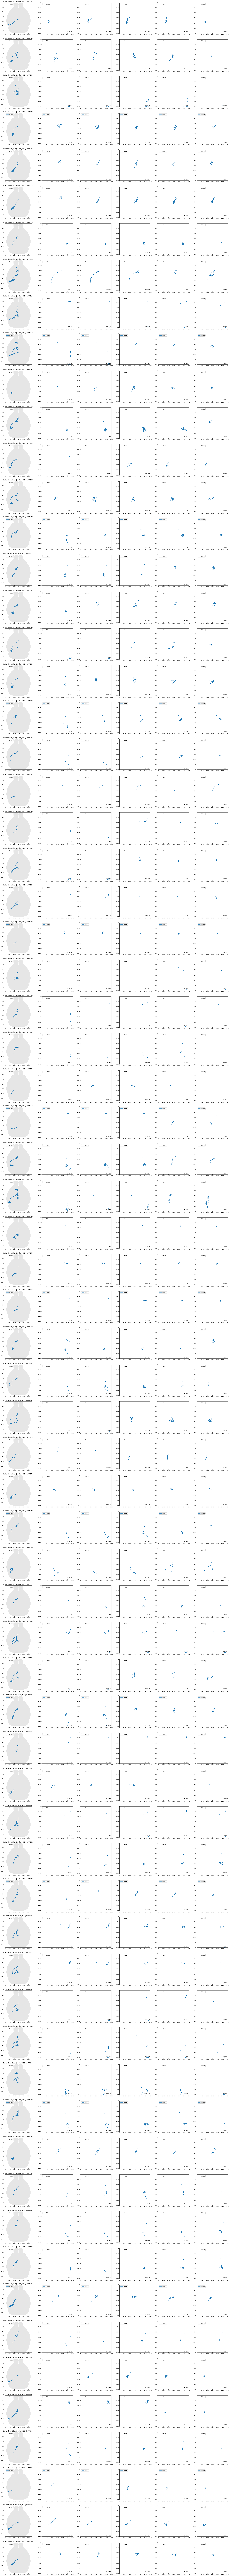

In [13]:
slice_thickness = 100

n_cells = len(SUB_list)
n_slices = 5
fig, ax = plt.subplots(n_cells, n_slices+1, figsize=(6*(n_slices+1), 6*n_cells))
for i,neuron_name in enumerate(SUB_list[:n_cells]):
    _ = axon_slice(neuron_name, slice_thickness, ax=ax[i,:], n_slices=n_slices)
    
fig.savefig("D:\\Songlin\\SUB.png", bbox_inches='tight')

In [47]:
neuron = nmt.neuron(os.path.join(swc_path,neuron_name+'.swc'))
df = neuron.swc.copy()
df = df[df.type==2]
tp = interst_Contour[
    np.array(df.x/25, dtype=int).reshape(-1,),
    np.array(df.y/25, dtype=int).reshape(-1,),
    np.array(df.z/25, dtype=int).reshape(-1,),
]
df['type'] = tp
s_min = int(np.min(df.x) / slice_thickness)
s_max = int(np.max(df.x) / slice_thickness) + 1

df_slice = pd.DataFrame(index=range(s_min, s_max), columns=['x_center', 'thickness', 'x_min', 'x_max', 'total_branch'])
for i in range(s_min, s_max):
    x_min = i*slice_thickness
    x_max = (i+1)*slice_thickness
    tp = df[((df.x<(x_max)) & (df.x>(x_min)))]
    df_slice.loc[i] = [
        (i + 0.5) * slice_thickness,
        slice_thickness,
        x_min,
        x_max,
        len(tp)
    ]

# Filter df_slice
df_slice = df_slice.astype('float')
df_slice = df_slice[df_slice.total_branch>1]
if len(df_slice)>n_slices:
    df_slice = df_slice.sort_values(['total_branch'], ascending=False).iloc[:n_slices,:]
    df_slice = df_slice.sort_values(['x_center'])

sns.lineplot(x='x_center', y='total_branch', data=df_slice)

NameError: name 'interst_Contour' is not defined